In [1]:
import pandas as pd

# Replace 'path_to_csv' with the actual path to your CSV file
path_to_csv = 'Mall_Customers.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path_to_csv)

# Now you can work with the 'df' DataFrame to analyze and manipulate the data
print(df.head())  # Print the first few rows of the DataFrame


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


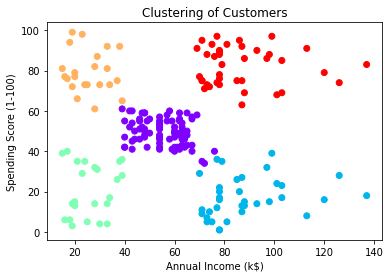

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace 'path_to_csv' with the actual path to your CSV file
path_to_csv = 'Mall_Customers.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path_to_csv)

# Extract the features you're interested in
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Choose the number of clusters you want
num_clusters = 5

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Plotting the clusters
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df['Cluster'], cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering of Customers")
plt.show()

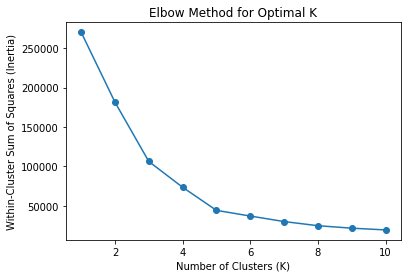

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
path_to_csv = 'Mall_Customers.csv'
df = pd.read_csv(path_to_csv)

# Extract the features for clustering
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Range of K values
k_values = range(1, 11)

# Store the within-cluster sum of squares (inertia) for each K
inertia_values = []

# Perform K-Means clustering for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal K
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


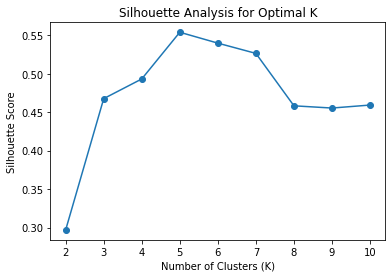

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
path_to_csv = 'Mall_Customers.csv'
df = pd.read_csv(path_to_csv)

# Extract the features for clustering
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Range of K values
k_values = range(2, 11)  # Start from 2 as silhouette score requires at least 2 clusters

# Store the silhouette scores for each K
silhouette_scores = []

# Perform K-Means clustering and calculate silhouette score for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

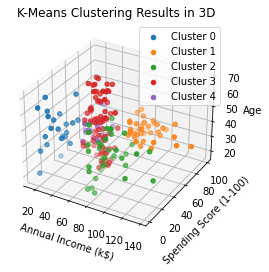

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Load the CSV file into a pandas DataFrame
path_to_csv = 'Mall_Customers.csv'
df = pd.read_csv(path_to_csv)

# Extract the features for clustering
features = df[["Annual Income (k$)", "Spending Score (1-100)", "Age"]]

# Choose the number of clusters (you need to specify this)
num_clusters = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_num in range(num_clusters):
    cluster_data = features[df['Cluster'] == cluster_num]
    ax.scatter(cluster_data["Annual Income (k$)"], cluster_data["Spending Score (1-100)"], cluster_data["Age"], label=f'Cluster {cluster_num}')

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.set_title('K-Means Clustering Results in 3D')
ax.legend()

plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Read the data from a CSV file named "Mall_Customers.csv"
path_to_csv = 'Mall_Customers.csv'
df = pd.read_csv(path_to_csv)

# Step 2: Use the features ["Annual Income (k$)", "Spending Score (1-100)"] for clustering
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Step 3: Cluster using K-Means with K = 1 to 10
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Step 4: Find the Best K
best_k = 0
min_distortion = float('inf')

for i, distortion in enumerate(inertia_values):
    if distortion < min_distortion:
        min_distortion = distortion
        best_k = i + 1

print(f"Best K value: {best_k}")

# Step 5: Visualize the clustering results
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_kmeans.fit(features)
best_cluster_labels = best_kmeans.labels_

plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=best_cluster_labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering with K={best_k}')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial import Voronoi, voronoi_plot_2d

# Step 1: Read the image
image_path = "rose-yellow.png"
image = imread(image_path)

# Reshape the image to a 2D array of RGB values
height, width, _ = image.shape
pixels = image.reshape(-1, 3)

# Step 2: Use RGB values for clustering
features = pixels.astype(float)

# Step 3: Cluster using K-Means with K = 10
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(features)

# Step 4: Plot the Silhouette Coefficient
silhouette_avg = silhouette_score(features, cluster_labels)
print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

# Step 5: Visualize the clustering results using Voronoi cells
vor = Voronoi(kmeans.cluster_centers_)
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='grey', line_width=2)
plt.scatter(features[:, 0], features[:, 1], c=cluster_labels, cmap='rainbow', marker='.')
plt.xlim(0, width)
plt.ylim(0, height)
plt.gca().invert_yaxis()
plt.title("Voronoi Cells for Clusters")
plt.show()

# Step 6: Display image with color by cluster centers
cluster_centers_rgb = kmeans.cluster_centers_.astype(int)
clustered_image = cluster_centers_rgb[cluster_labels].reshape(height, width, 3).astype(np.uint8)
plt.imshow(clustered_image)
plt.title("Image with Clustered Colors")
plt.axis('off')
plt.show()

# Step 7: Save image as "rose-yellow-kmeans.png"
output_path = "rose-yellow-kmeans.png"
plt.imsave(output_path, clustered_image)
print(f"Clustered image saved as '{output_path}'")

ValueError: cannot reshape array of size 156800 into shape (3)